In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import os,sys
try:
    import this_is_root
except:
    os.chdir(os.path.pardir) # change workdir to be root dir
    sys.path.insert(0, os.path.realpath("."))

In [72]:
def load_pickle(file_path):
    try:
        with open(file_path, 'rb') as file:
            loaded_data = pickle.load(file)
            print("Pickle file loaded successfully.")
            # 'loaded_data' now contains the deserialized object from the pickle file
            print("Loaded Data:", loaded_data.keys())
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")

    return loaded_data

Pickle file loaded successfully.
Loaded Data: dict_keys(['train_loss', 'valid_loss', 'epoch', 'time'])


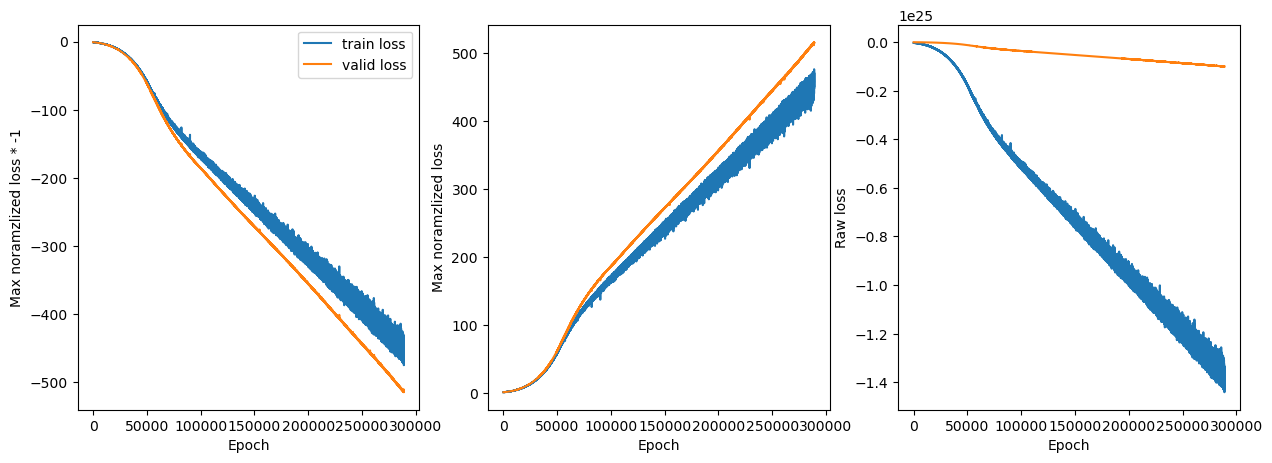

In [91]:
file_path = 'run_statistics_spot_detection.pickle'
loaded_data = load_pickle(file_path)

NCOLS = 3
fig,axes  = plt.subplots(ncols=NCOLS, nrows=1, figsize=(NCOLS*5,5))
axes[0].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss']/np.max(loaded_data['train_loss'])*-1,label='train loss')
axes[0].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss']/np.max(loaded_data['valid_loss'])*-1,label='valid loss')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Max noramzlized loss * -1")

axes[1].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss']/np.max(loaded_data['train_loss']),label='train loss')
axes[1].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss']/np.max(loaded_data['valid_loss']),label='valid loss')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Max noramzlized loss")

axes[2].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss'],label='train loss')
axes[2].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss'],label='valid loss')
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Raw loss")

# axes.set_yscale('log')
# axes[0].set_xlabel("Epoch")
# axes[0].set_ylabel("Max noramzlized loss")
# axes.set_ylim([1e-2,1e0])
axes[0].legend()
plt.show()